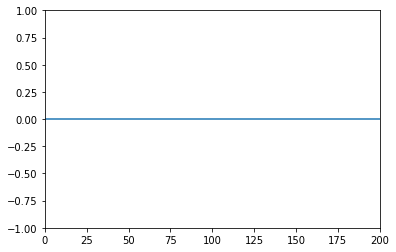

In [1]:
#IMPORT SOLUTION FROM LAST WEEK HERE
#step 1  physical constants      
import math
import numpy as np

c= 2.99792458e8
mu = 4.0*math.pi*1.0e-7
e_0 = 1.0/((c**2)*mu)
e_r = 1.0

#step 2 spatial domain information
Nx = 200
dx = 1e-3

#step 3  field variable allocation
Hy = np.zeros(Nx)   #magentic field y component
Ez = np.zeros(Nx)   #electric field z-component


#step 4 time information
dt = dx/c
Nt = 400

#helpers
midX   = round(Nx/2)                           #midpoint in the x-direction
quartX = round(Nx/4)                           #quarterpoint in the x-direction

import matplotlib.pyplot as plt
from IPython import display
    
for t in range(Nt):
    for ix in range(1, Nx):
        Ez[ix] = Ez[ix] + dt/(e_0*e_r) * (Hy[ix] - Hy[ix-1])/dx
        
        #extra disturbance
    Hy[Nx-1]=Hy[Nx-2]        
    Ez[midX] = Ez[midX] + math.exp(-((t-50)**2)/49)
        
    for ix in range(Nx-1):
        Hy[ix] = Hy[ix] + dt/mu * (Ez[ix+1] - Ez[ix])/dx
    plt.plot(np.linspace(1, Nx, Nx), Ez)
    plt.axis([0,Nx, -1, 1])
    plt.pause(0.001)
    display.clear_output(wait=True)
    Ez[0]= Ez[1]

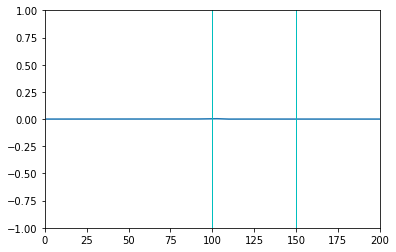

In [2]:
Hy = np.zeros(Nx)   #magentic field y component
Ez = np.zeros(Nx)   #electric field z-component

e_r = np.ones(200)#initiate a permittivity vector, and change values at certain positions
e_r[midX:midX+quartX] = 1.5**2
#use this vector as described in slides in your for loop that solves the equations
for t in range(Nt):
    for ix in range(1, Nx):
        Ez[ix] = Ez[ix] + dt/(e_0*e_r[ix]) * (Hy[ix] - Hy[ix-1])/dx
        
        #extra disturbance
    Hy[Nx-1]=Hy[Nx-2]        
    Ez[midX-quartX] = Ez[midX-quartX] + math.exp(-((t-50)**2)/49)
        
    for ix in range(Nx-1):
        Hy[ix] = Hy[ix] + dt/mu * (Ez[ix+1] - Ez[ix])/dx
    plt.plot(np.linspace(1, Nx, Nx), Ez)
    plt.plot([midX,midX], [-1, 1], color = 'c', linestyle = '-', linewidth = 1)
    plt.plot([midX+quartX,midX+quartX], [-1, 1], color = 'c', linestyle = '-', linewidth = 1)
    plt.axis([0,Nx, -1,1])
    plt.pause(0.001)
    display.clear_output(wait=True)
    Ez[0]= Ez[1]

# Explain in your own words how you modelled location-dependent permittivity?

This can be implemented by introducing an array with the same length as there are positions in the space  to assign a relative permittivity value to. Every element present the relative permittivity of the position in the space. When calculating the next value of the electrical component, we just need to take the relative permittivity of the position instead of an overall constant value. This will be enough to use the correct relative permittivity for every position in the calculation.